In [1]:
# pip3 install -U scikit-fuzzy # http://pythonhosted.org/scikit-fuzzy/auto_examples/index.html
# Instalar via terminal

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Número de eleitores

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


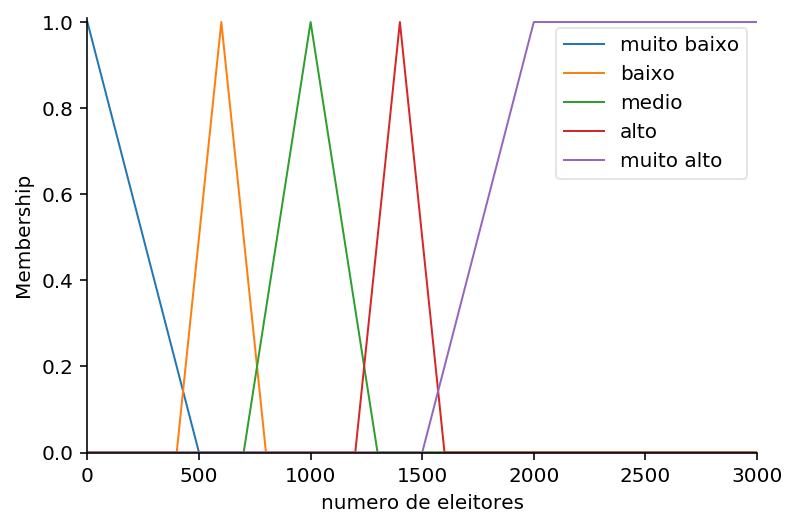

In [3]:
# Número de eleitores
ne = ctrl.Antecedent(np.arange(0, 3001, 1), 'numero de eleitores')

ne['muito baixo'] = fuzz.trimf(ne.universe, [0, 0, 500])
ne['baixo'] = fuzz.trimf(ne.universe, [400, 600, 800])
ne['medio'] = fuzz.trimf(ne.universe, [700, 1000, 1300])
ne['alto'] = fuzz.trimf(ne.universe, [1200, 1400, 1600])
ne['muito alto'] = fuzz.trapmf(ne.universe, [1500, 2000, 3000, 3000])

ne.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


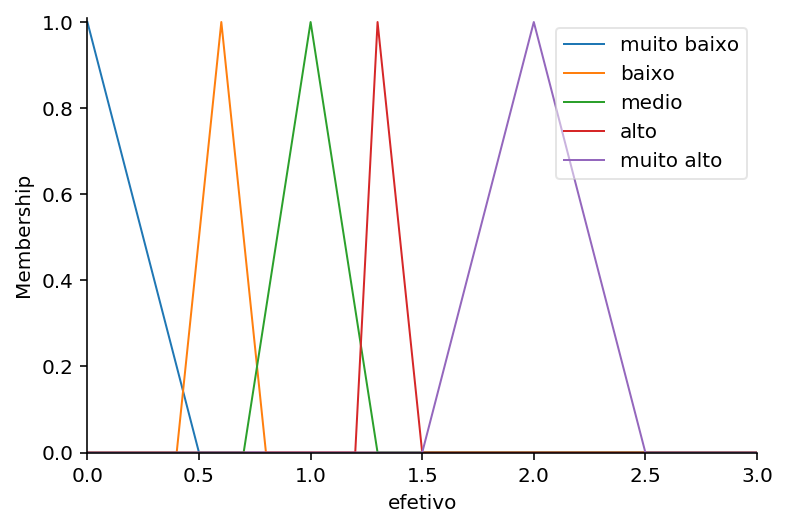

In [4]:
# Estimativa de efetivo (ne)
ef_ne = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef_ne['muito baixo'] = fuzz.trimf(ef_ne.universe, [0, 0, 0.5])
ef_ne['baixo'] = fuzz.trimf(ef_ne.universe, [0.4, 0.6, 0.8])
ef_ne['medio'] = fuzz.trimf(ef_ne.universe, [0.7, 1.0, 1.3])
ef_ne['alto'] = fuzz.trimf(ef_ne.universe, [1.2, 1.3, 1.5])
ef_ne['muito alto'] = fuzz.trimf(ef_ne.universe, [1.5, 2.0, 2.5])

ef_ne.view()

In [5]:
# Número de eleitores (ne)
regra_ne_1 = ctrl.Rule((ne['muito alto'] | ne['alto']), ef_ne['muito alto'])
regra_ne_2 = ctrl.Rule(ne['medio'], ef_ne['medio'])
regra_ne_3 = ctrl.Rule(ne['baixo'], ef_ne['baixo'])
regra_ne_4 = ctrl.Rule(ne['muito baixo'], ef_ne['muito baixo'])

In [6]:
## Cria um sistema de controle e uma simulação para o número de eleitores
eleicao_ne_ctrl = ctrl.ControlSystem([regra_ne_1, regra_ne_2, regra_ne_3, regra_ne_4])
eleicao_ne_sim = ctrl.ControlSystemSimulation(eleicao_ne_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


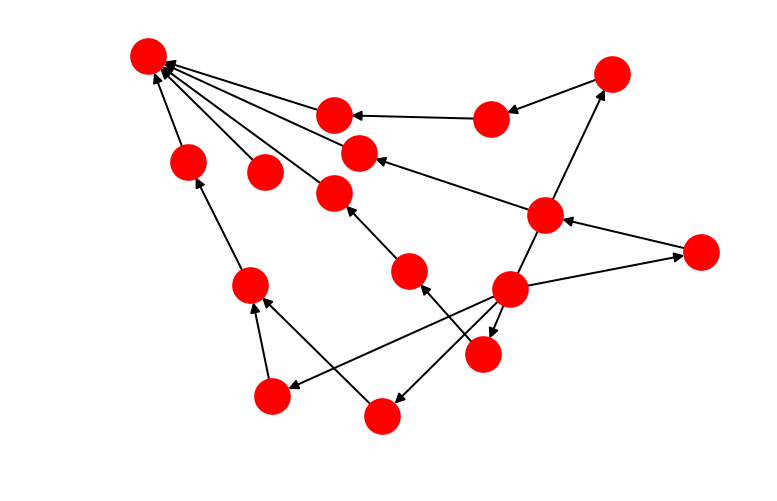

In [7]:
eleicao_ne_ctrl.view()

ne:  OrderedDict([('efetivo', 0.18571428571428567)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


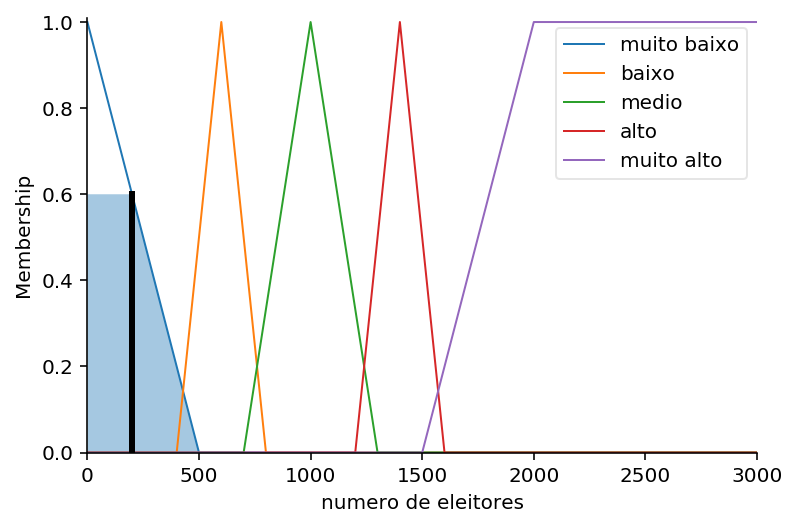

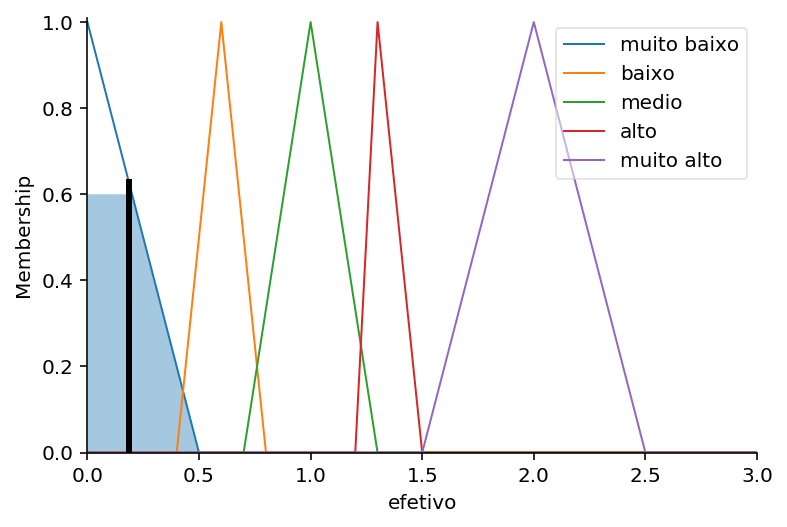

In [8]:
# Entrada
eleicao_ne_sim.input['numero de eleitores'] = 200

# Calcula
eleicao_ne_sim.compute()
n_ef_ne = eleicao_ne_sim.output
print('ne: ', n_ef_ne)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ne.view(sim=eleicao_ne_sim)
ef_ne.view(sim=eleicao_ne_sim)

# Crimes comuns (cc)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


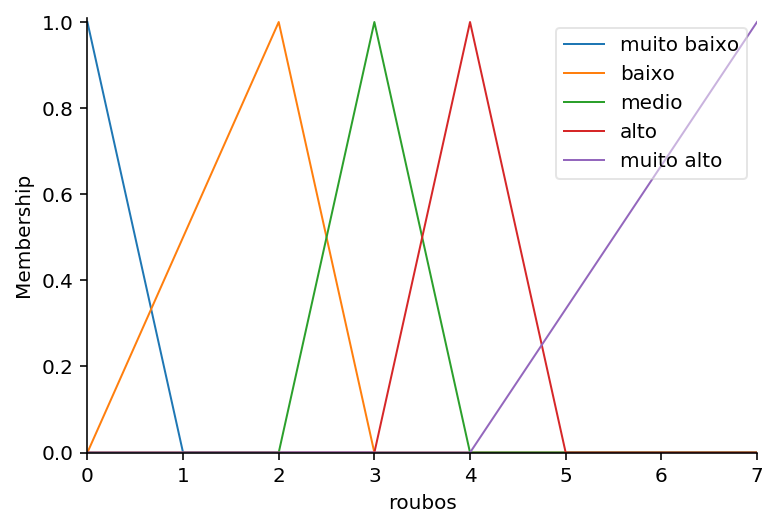

In [9]:
# Roubos
r = ctrl.Antecedent(np.arange(0, 8, 1), 'roubos')

r['muito baixo'] = fuzz.trimf(r.universe, [0, 0, 1])
r['baixo'] = fuzz.trimf(r.universe, [0, 2, 3])
r['medio'] = fuzz.trimf(r.universe, [2, 3, 4])
r['alto'] = fuzz.trimf(r.universe, [3, 4, 5])
r['muito alto'] = fuzz.trimf(r.universe, [4, 7, 7])

r.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


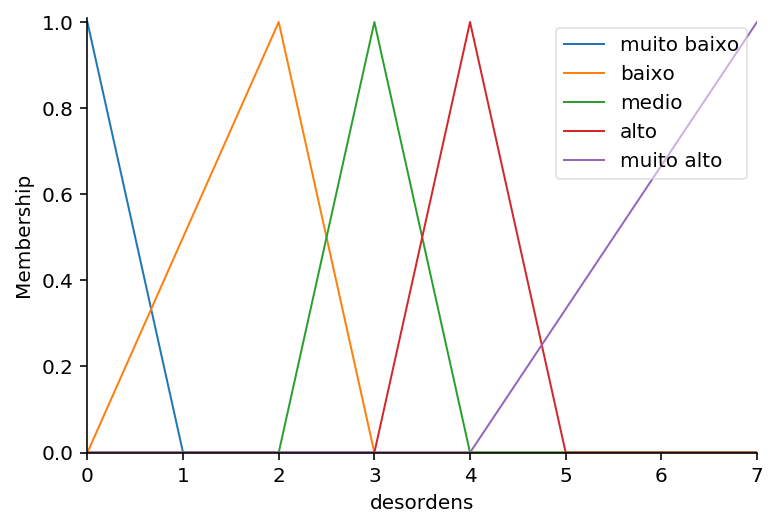

In [10]:
# Desordens
d = ctrl.Antecedent(np.arange(0, 8, 1), 'desordens')

d['muito baixo'] = fuzz.trimf(d.universe, [0, 0, 1])
d['baixo'] = fuzz.trimf(d.universe, [0, 2, 3])
d['medio'] = fuzz.trimf(d.universe, [2, 3, 4])
d['alto'] = fuzz.trimf(d.universe, [3, 4, 5])
d['muito alto'] = fuzz.trimf(d.universe, [4, 7, 7])

d.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


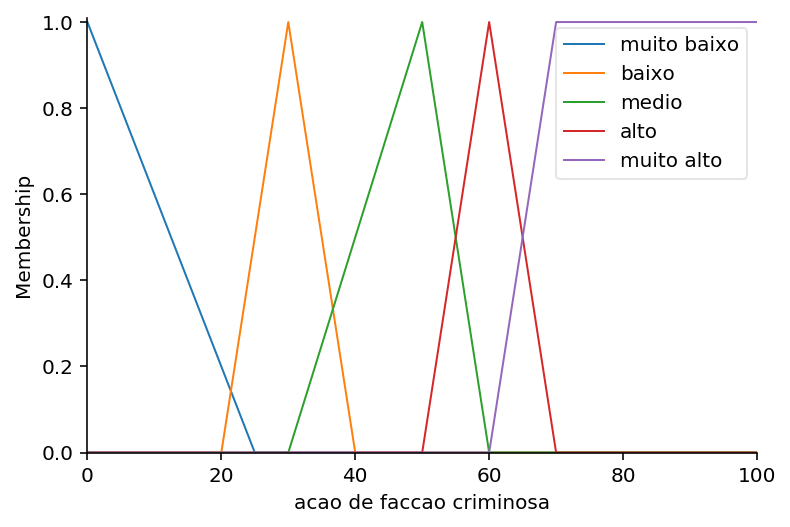

In [11]:
# Ação de facção criminosa

afc = ctrl.Antecedent(np.arange(0, 101, 1), 'acao de faccao criminosa')

afc['muito baixo'] = fuzz.trimf(afc.universe, [0, 0, 25])
afc['baixo'] = fuzz.trimf(afc.universe, [20, 30, 40])
afc['medio'] = fuzz.trimf(afc.universe, [30, 50, 60])
afc['alto'] = fuzz.trimf(afc.universe, [50, 60, 70])
afc['muito alto'] = fuzz.trapmf(afc.universe, [60, 70, 100, 101])

afc.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


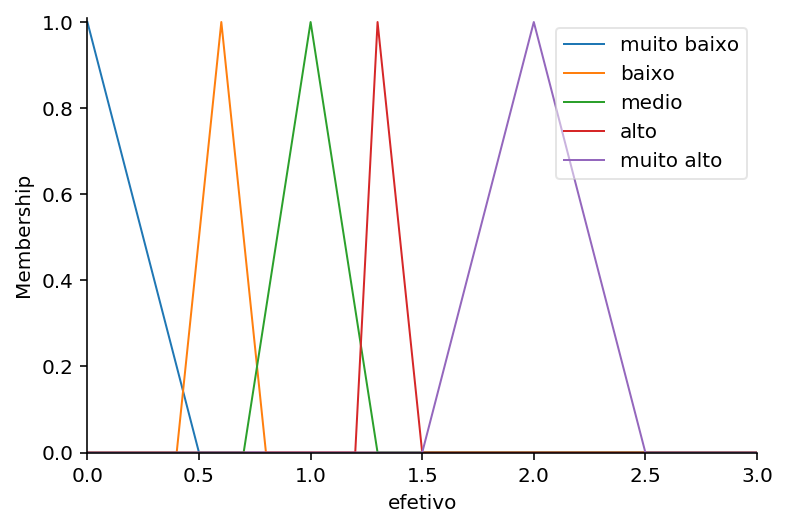

In [12]:
# Estimativa de efetivo (cc)
ef_cc = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef_cc['muito baixo'] = fuzz.trimf(ef_cc.universe, [0, 0, 0.5])
ef_cc['baixo'] = fuzz.trimf(ef_cc.universe, [0.4, 0.6, 0.8])
ef_cc['medio'] = fuzz.trimf(ef_cc.universe, [0.7, 1.0, 1.3])
ef_cc['alto'] = fuzz.trimf(ef_cc.universe, [1.2, 1.3, 1.5])
ef_cc['muito alto'] = fuzz.trimf(ef_cc.universe, [1.5, 2.0, 2.5])

ef_cc.view()

In [13]:
# Crimes comuns (r, afc, d)
regra_cc_ma_1 = ctrl.Rule(r['muito alto']  | afc['muito alto']  | d['muito alto'], ef_cc['muito alto'])

regra_cc_a_1 = ctrl.Rule( r['alto'] & ~afc['muito alto'] & ~d['muito alto'], ef_cc['alto'])
regra_cc_a_2 = ctrl.Rule(~r['muito alto'] &  afc['alto'] & ~d['muito alto'], ef_cc['alto'])
regra_cc_a_3 = ctrl.Rule(~r['muito alto'] & ~afc['muito alto'] & d['alto'], ef_cc['alto'])

regra_cc_m_1 = ctrl.Rule( r['medio'] & (afc['medio'] | afc['baixo'] | afc['muito baixo']) & (d['medio'] | d['baixo'] | d['muito baixo']), ef_cc['medio'])
regra_cc_m_2 = ctrl.Rule((r['medio'] | r['baixo'] | r['muito baixo']) & afc['medio'] & (d['medio'] | d['baixo'] | d['muito baixo']), ef_cc['medio'])
regra_cc_m_3 = ctrl.Rule((r['medio'] | r['baixo'] | r['muito baixo']) & (afc['medio'] | afc['baixo'] | afc['muito baixo']) & d['medio'], ef_cc['medio'])

regra_cc_b_1 = ctrl.Rule((r['muito baixo'] | r['baixo']) & (afc['muito baixo'] | afc['baixo']) & d['baixo'], ef_cc['baixo'])
regra_cc_b_2 = ctrl.Rule((r['muito baixo'] | r['baixo']) &  afc['baixo'] & (d['muito baixo'] | d['baixo']), ef_cc['baixo'])
regra_cc_b_3 = ctrl.Rule(r['baixo'] & (afc['muito baixo'] | afc['baixo']) & (d['muito baixo'] | d['baixo']), ef_cc['baixo'])

regra_cc_mb_1 = ctrl.Rule(r['muito baixo'] & afc['muito baixo'] & d['muito baixo'], ef_cc['muito baixo'])

In [14]:
# Cria um sistema de controle e uma simulação para crimes comuns
eleicao_cc_ctrl = ctrl.ControlSystem([regra_cc_ma_1,
                                     regra_cc_a_1, regra_cc_a_2, regra_cc_a_3,
                                     regra_cc_m_1, regra_cc_m_2, regra_cc_m_3,
                                     regra_cc_b_1, regra_cc_b_2, regra_cc_b_3,
                                     regra_cc_mb_1])
eleicao_cc_sim = ctrl.ControlSystemSimulation(eleicao_cc_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


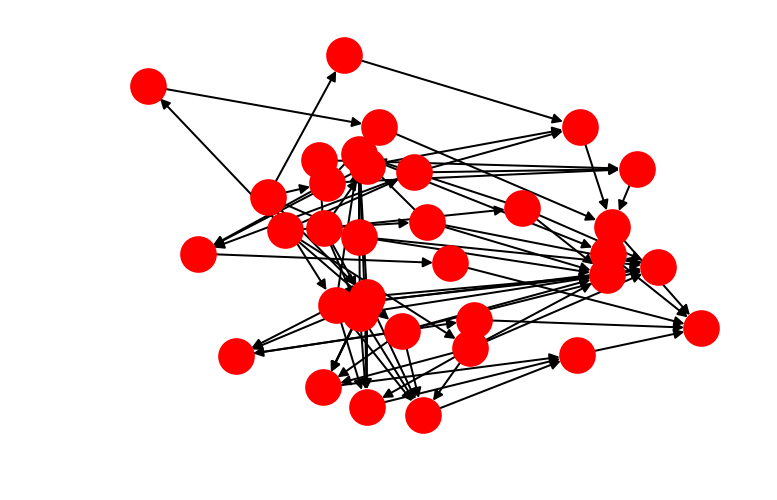

In [15]:
eleicao_cc_ctrl.view()

cc:  OrderedDict([('efetivo', 2.0)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


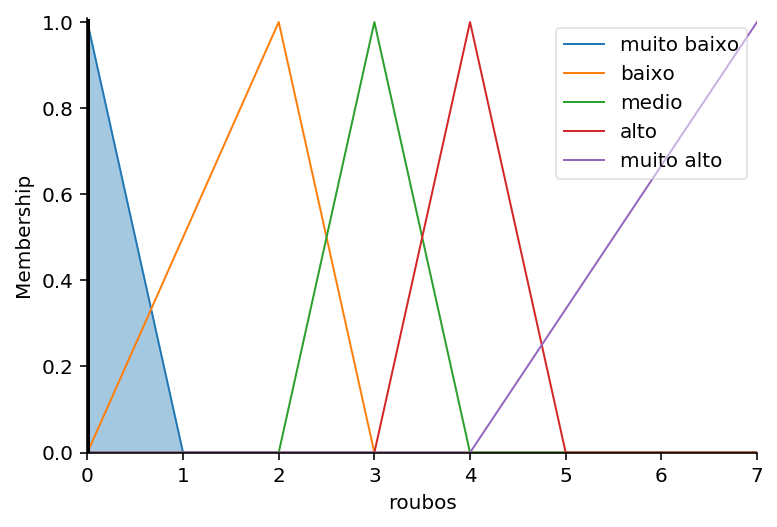

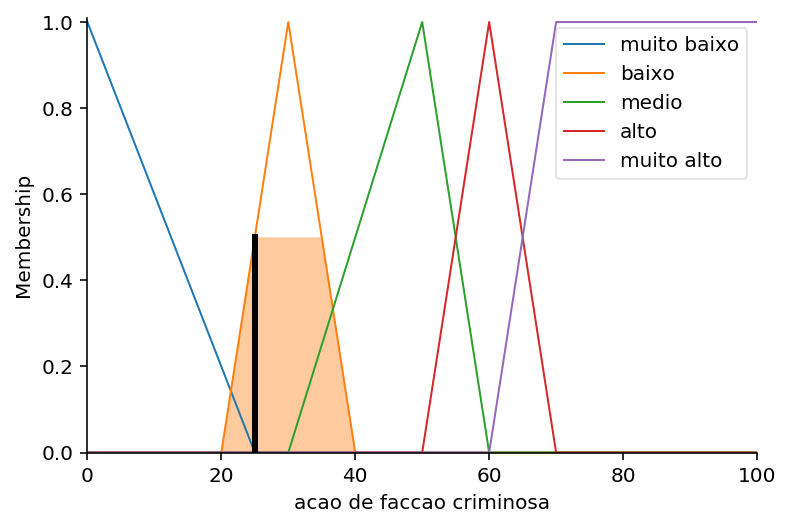

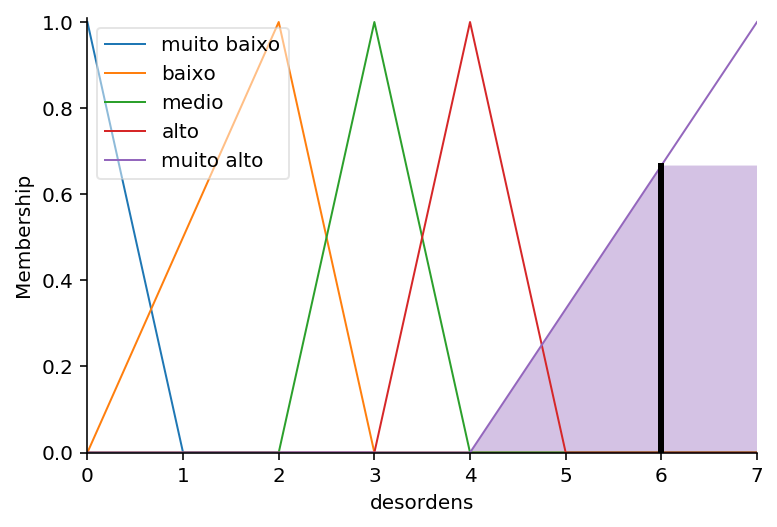

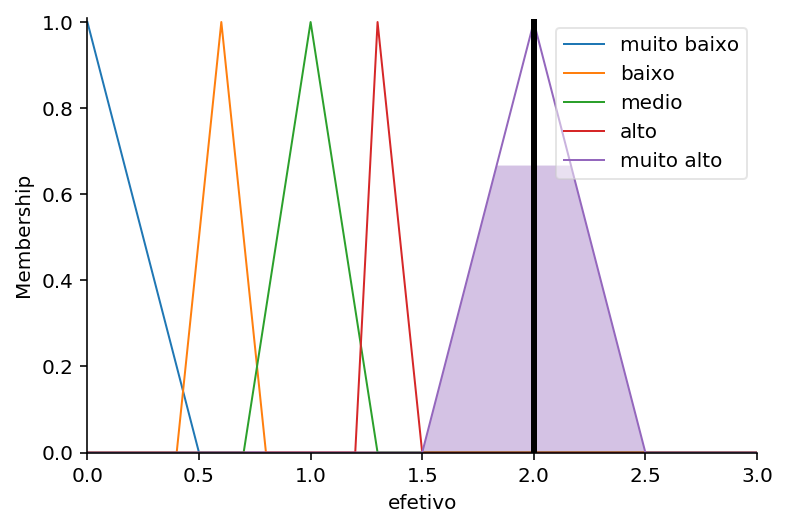

In [56]:
# Entrada
eleicao_cc_sim.input['roubos'] = 0
eleicao_cc_sim.input['desordens'] = 6
eleicao_cc_sim.input['acao de faccao criminosa'] = 25

# Calcula
eleicao_cc_sim.compute()
n_ef_cc = eleicao_cc_sim.output
print('cc: ', n_ef_cc)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
r.view(sim=eleicao_cc_sim)
afc.view(sim=eleicao_cc_sim)
d.view(sim=eleicao_cc_sim)

ef_cc.view(sim=eleicao_cc_sim)

# Crimes eleitorais

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


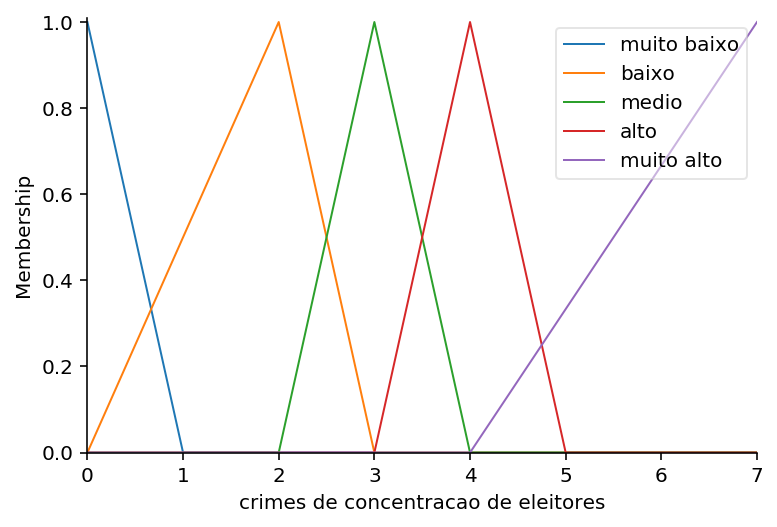

In [17]:
# Crimes de concentração de eleitores
cce = ctrl.Antecedent(np.arange(0, 8, 1), 'crimes de concentracao de eleitores')

cce['muito baixo'] = fuzz.trimf(cce.universe, [0, 0, 1])
cce['baixo'] = fuzz.trimf(cce.universe, [0, 2, 3])
cce['medio'] = fuzz.trimf(cce.universe, [2, 3, 4])
cce['alto'] = fuzz.trimf(cce.universe, [3, 4, 5])
cce['muito alto'] = fuzz.trimf(cce.universe, [4, 7, 7])

cce.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


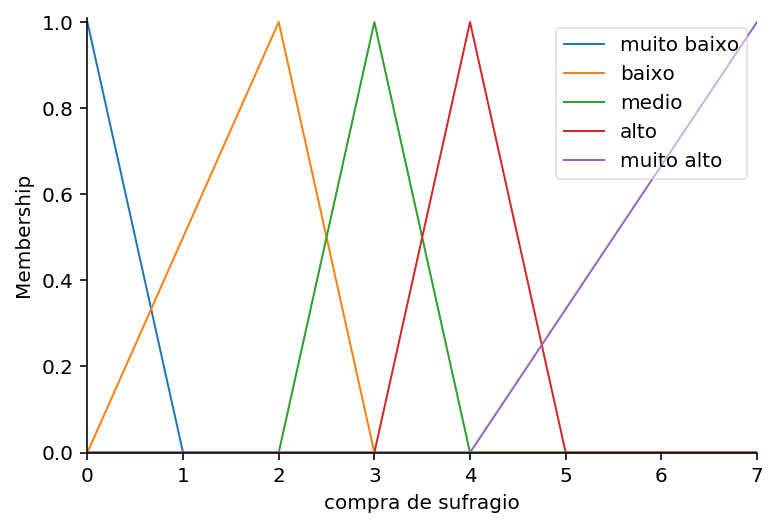

In [18]:
# Compra de sufrágio
cs = ctrl.Antecedent(np.arange(0, 8, 1), 'compra de sufragio')

cs['muito baixo'] = fuzz.trimf(cs.universe, [0, 0, 1])
cs['baixo'] = fuzz.trimf(cs.universe, [0, 2, 3])
cs['medio'] = fuzz.trimf(cs.universe, [2, 3, 4])
cs['alto'] = fuzz.trimf(cs.universe, [3, 4, 5])
cs['muito alto'] = fuzz.trimf(cs.universe, [4, 7, 7])

cs.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


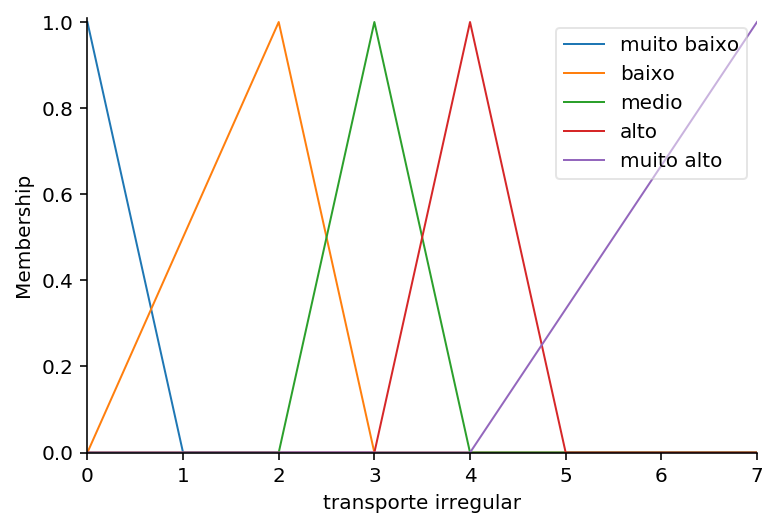

In [19]:
# Transporte irregular
ti= ctrl.Antecedent(np.arange(0, 8, 1), 'transporte irregular')

ti['muito baixo'] = fuzz.trimf(ti.universe, [0, 0, 1])
ti['baixo'] = fuzz.trimf(ti.universe, [0, 2, 3])
ti['medio'] = fuzz.trimf(ti.universe, [2, 3, 4])
ti['alto'] = fuzz.trimf(ti.universe, [3, 4, 5])
ti['muito alto'] = fuzz.trimf(ti.universe, [4, 7, 7])

ti.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


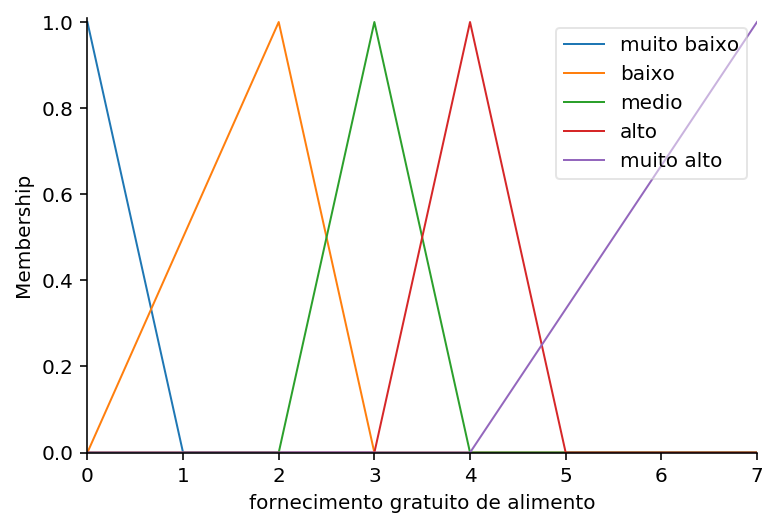

In [20]:
# Fornecimento gratuito de alimento
fga = ctrl.Antecedent(np.arange(0, 8, 1), 'fornecimento gratuito de alimento')

fga['muito baixo'] = fuzz.trimf(fga.universe, [0, 0, 1])
fga['baixo'] = fuzz.trimf(fga.universe, [0, 2, 3])
fga['medio'] = fuzz.trimf(fga.universe, [2, 3, 4])
fga['alto'] = fuzz.trimf(fga.universe, [3, 4, 5])
fga['muito alto'] = fuzz.trimf(fga.universe, [4, 7, 7])

fga.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


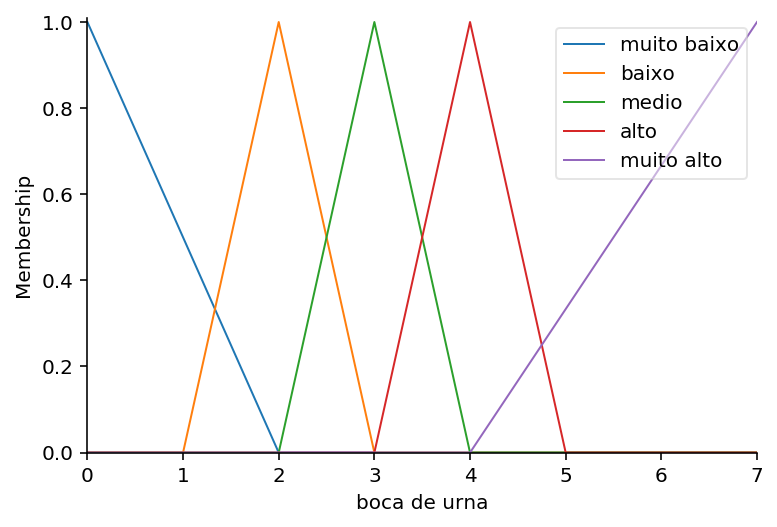

In [21]:
# Boca de urna
bu = ctrl.Antecedent(np.arange(0, 8, 1), 'boca de urna')

bu['muito baixo'] = fuzz.trimf(bu.universe, [0, 0, 2])
bu['baixo'] = fuzz.trimf(bu.universe, [1, 2, 3])
bu['medio'] = fuzz.trimf(bu.universe, [2, 3, 4])
bu['alto'] = fuzz.trimf(bu.universe, [3, 4, 5])
bu['muito alto'] = fuzz.trimf(bu.universe, [4, 7, 7])

bu.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


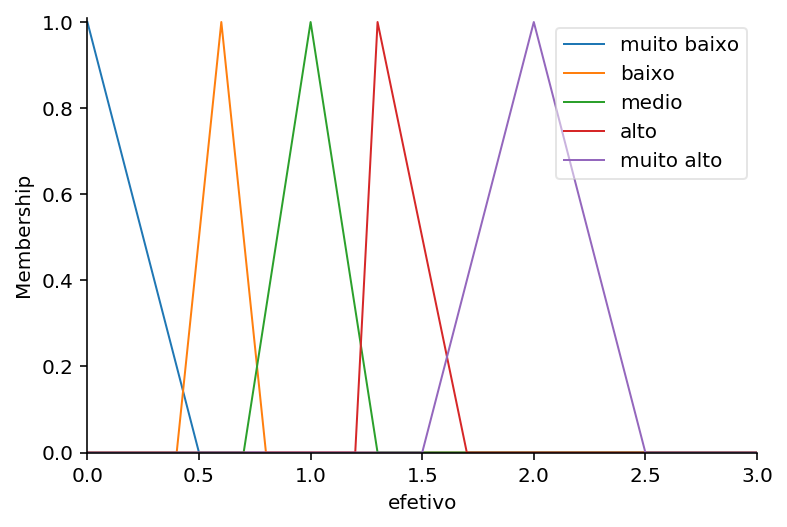

In [22]:
# Estimativa de efetivo (ce)
ef_ce = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef_ce['muito baixo'] = fuzz.trimf(ef_ce.universe, [0, 0, 0.5])
ef_ce['baixo'] = fuzz.trimf(ef_ce.universe, [0.4, 0.6, 0.8])
ef_ce['medio'] = fuzz.trimf(ef_ce.universe, [0.7, 1.0, 1.3])
ef_ce['alto'] = fuzz.trimf(ef_ce.universe, [1.2, 1.3, 1.7])
ef_ce['muito alto'] = fuzz.trimf(ef_ce.universe, [1.5, 2.0, 2.5])

ef_ce.view()

In [23]:
# Crime eleitorais (cs, ti, fga, bu, cce)
regra_ce_ma_1 = ctrl.Rule(cs['muito alto'] | ti['muito alto'] | fga['muito alto'] | bu['muito alto'] | cce['muito alto'], ef_ce['muito alto'])

regra_ce_a_1 = ctrl.Rule( cs['alto'] & ~ti['muito alto']  & ~fga['muito alto'] & ~bu['muito alto'] & ~cce['muito alto'], ef_ce['alto'])
regra_ce_a_2 = ctrl.Rule(~cs['muito alto'] & ti['alto'] & ~fga['muito alto'] & ~bu['muito alto'] & ~cce['muito alto'], ef_ce['alto'])
regra_ce_a_3 = ctrl.Rule(~cs['muito alto'] & ~ti['muito alto'] & fga['alto'] & ~bu['muito alto'] & ~cce['muito alto'], ef_ce['alto'])
regra_ce_a_4 = ctrl.Rule(~cs['muito alto'] & ~ti['muito alto'] & ~fga['muito alto'] & bu['alto'] & ~cce['muito alto'], ef_ce['alto'])
regra_ce_a_5 = ctrl.Rule(~cs['muito alto'] & ~ti['muito alto'] & ~fga['muito alto'] & ~bu['muito alto'] & cce['alto'], ef_ce['alto'])

regra_ce_m_1 = ctrl.Rule((cs['medio'] | cs['baixo'] | cs['muito baixo']) & (ti['medio'] | ti['baixo'] | ti['muito baixo']) & (fga['medio'] | fga['baixo'] | fga['muito baixo']) & (bu['medio'] | bu['baixo'] | bu['muito baixo']) & (cce['medio'] | cce['baixo'] | cce['muito baixo']), ef_ce['medio'])

regra_ce_b_1 = ctrl.Rule((cs['muito baixo'] | cs['baixo']) & (ti['muito baixo'] | ti['baixo']) & fga['baixo'] & (bu['baixo'] | bu['muito baixo']) & (cce['baixo'] | cce['muito baixo']), ef_ce['baixo'])
regra_ce_b_2 = ctrl.Rule((cs['muito baixo'] | cs['baixo']) & ti['baixo'] & (fga['muito baixo'] | fga['baixo']) & (bu['baixo'] | bu['muito baixo']) & (cce['baixo'] | cce['muito baixo']), ef_ce['baixo'])
regra_ce_b_3 = ctrl.Rule(cs['baixo'] & (ti['muito baixo'] | ti['baixo']) & (fga['muito baixo'] | fga['baixo']) & (bu['baixo'] | bu['muito baixo']) & (cce['baixo'] | cce['muito baixo']), ef_ce['baixo'])
regra_ce_b_4 = ctrl.Rule((cs['muito baixo'] | cs['baixo']) & (ti['muito baixo'] | ti['baixo']) & (fga['muito baixo'] | fga['baixo']) & bu['baixo'] & (cce['baixo'] | cce['muito baixo']), ef_ce['baixo'])
regra_ce_b_5 = ctrl.Rule((cs['muito baixo'] | cs['baixo']) & (ti['muito baixo'] | ti['baixo']) & (fga['muito baixo'] | fga['baixo']) & (bu['baixo'] | bu['muito baixo']) & cce['medio'], ef_ce['baixo'])

regra_ce_mb_1 = ctrl.Rule(cs['muito baixo']  & ti['muito baixo']  & fga['muito baixo'] & cce['muito baixo'], ef_ce['muito baixo'])

In [24]:
# Cria um sistema de controle e uma simulação para crimes eleitorais
eleicao_ce_ctrl = ctrl.ControlSystem([regra_ce_ma_1,
                                      regra_ce_a_1, regra_ce_a_2, regra_ce_a_3, regra_ce_a_4, regra_ce_a_5,
                                      regra_ce_m_1,
                                      regra_ce_b_1, regra_ce_b_2, regra_ce_b_3, regra_ce_b_4, regra_ce_b_5,
                                      regra_ce_mb_1])
eleicao_ce_sim = ctrl.ControlSystemSimulation(eleicao_ce_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


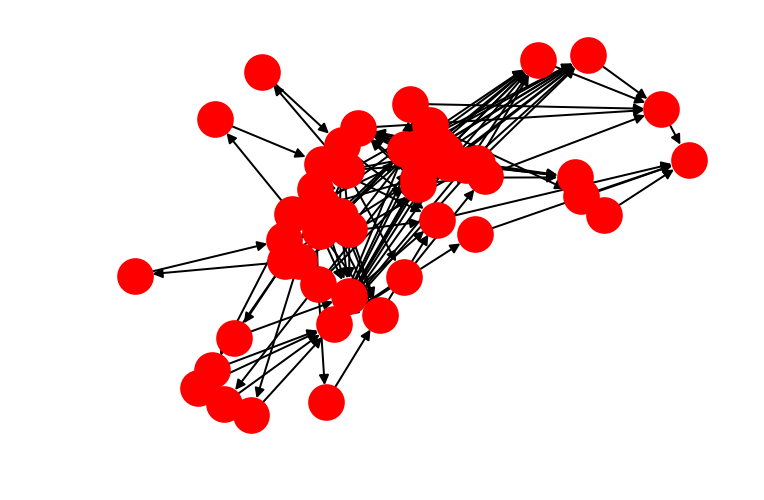

In [25]:
eleicao_ce_ctrl.view()

ce:  OrderedDict([('efetivo', 0.6000000000000001)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


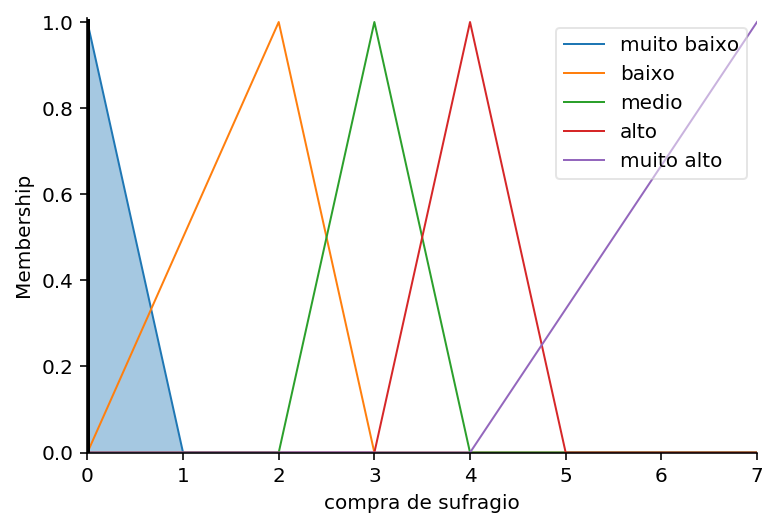

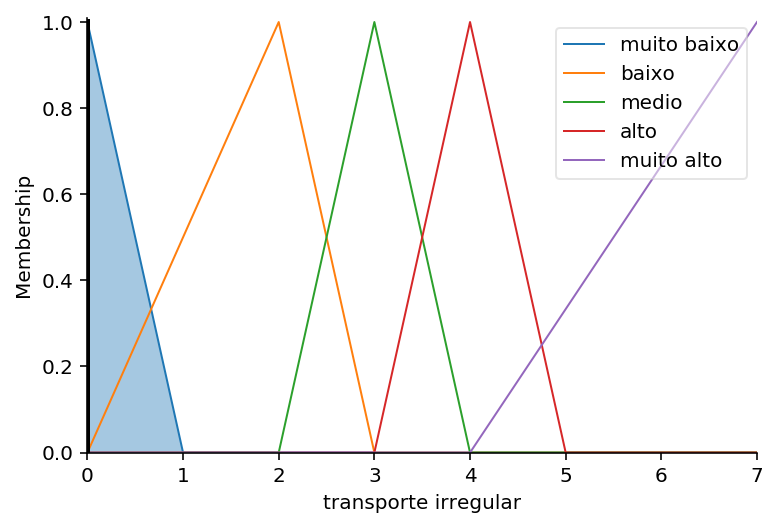

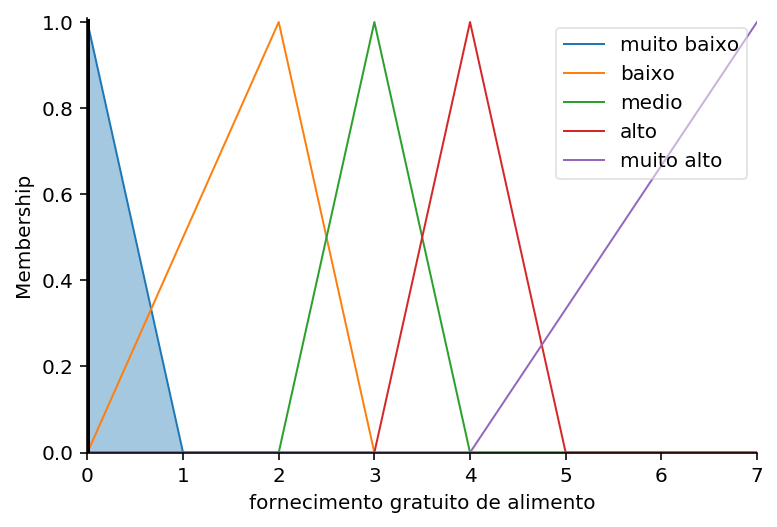

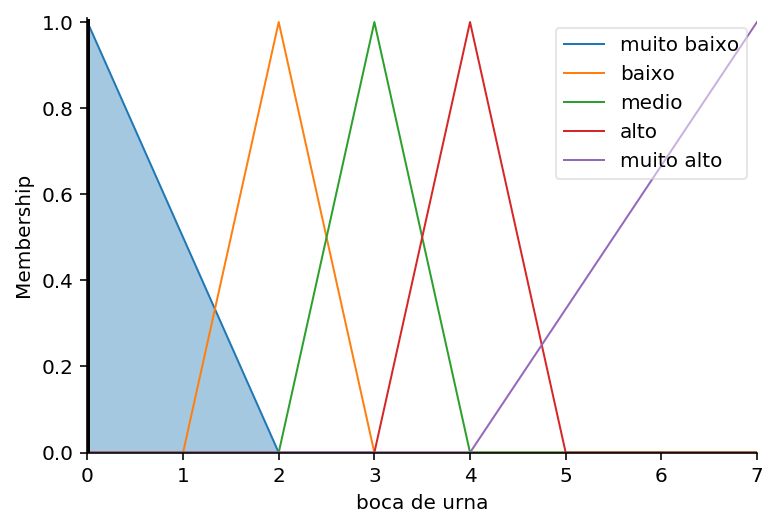

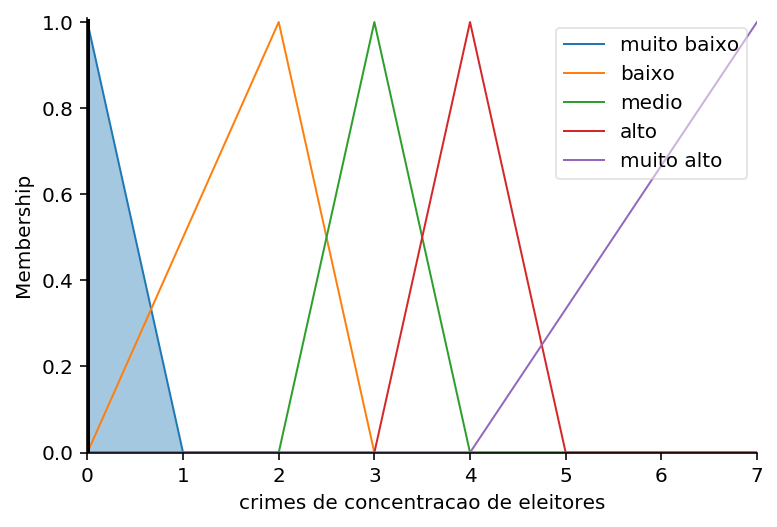

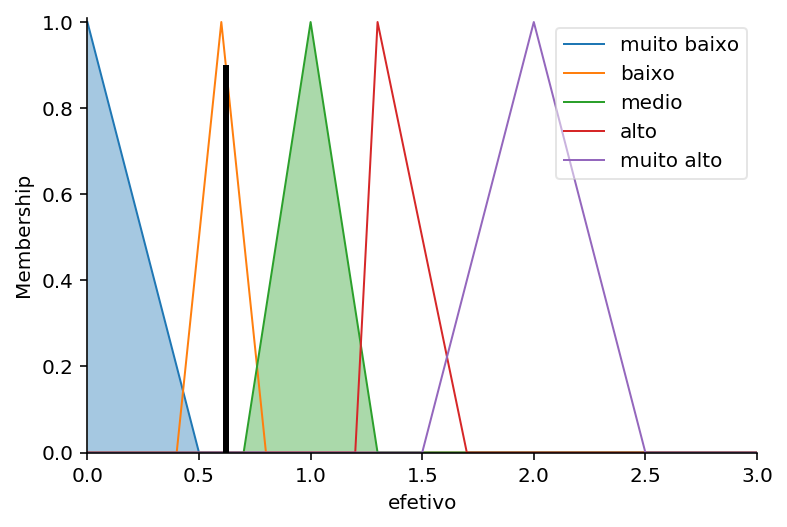

In [26]:
# Entrada
eleicao_ce_sim.input['compra de sufragio'] = 0
eleicao_ce_sim.input['transporte irregular'] = 0
eleicao_ce_sim.input['fornecimento gratuito de alimento'] = 0
eleicao_ce_sim.input['boca de urna'] = 0
eleicao_ce_sim.input['crimes de concentracao de eleitores'] = 0

# Calcula
eleicao_ce_sim.compute()
n_ef_ce = eleicao_cc_sim.output
print('ce: ', n_ef_ce)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
cs.view(sim=eleicao_ce_sim)
ti.view(sim=eleicao_ce_sim)
fga.view(sim=eleicao_ce_sim)
bu.view(sim=eleicao_ce_sim)
cce.view(sim=eleicao_ce_sim)
ef_ce.view(sim=eleicao_ce_sim)

# Desinteligência e ameaças

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


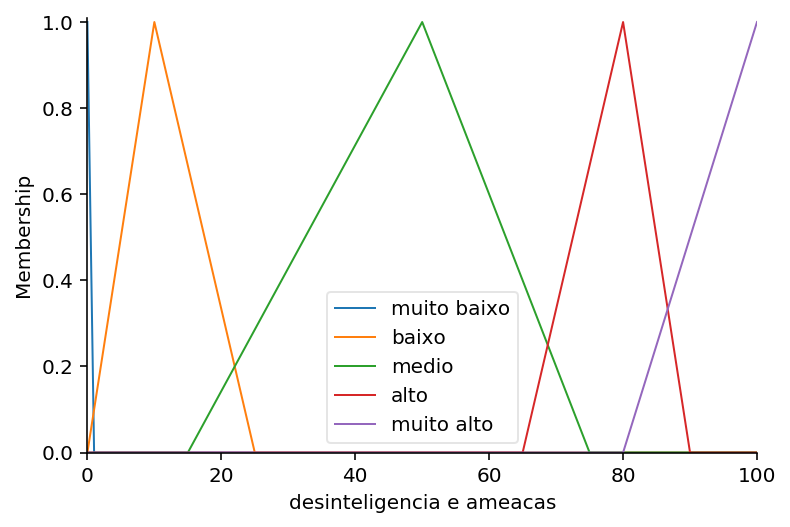

In [27]:
# Desinteligência e ameaças
da = ctrl.Antecedent(np.arange(0, 101, 1), 'desinteligencia e ameacas')

da['muito baixo'] = fuzz.trimf(da.universe, [0, 0, 1])
da['baixo'] = fuzz.trimf(da.universe, [0, 10, 25])
da['medio'] = fuzz.trimf(da.universe, [15, 50, 75])
da['alto'] = fuzz.trimf(da.universe, [65, 80, 90])
da['muito alto'] = fuzz.trimf(da.universe, [80, 100, 100])

da.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


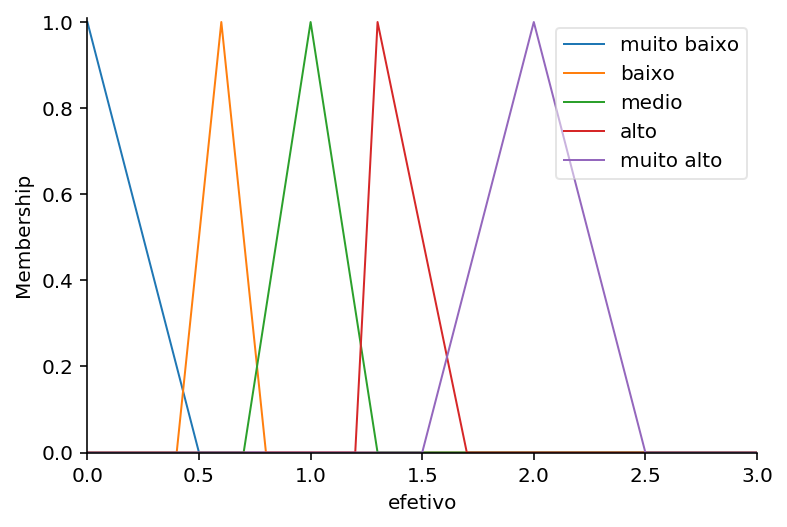

In [28]:
# Estimativa de efetivo (da)
ef_da = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef_da['muito baixo'] = fuzz.trimf(ef_da.universe, [0, 0, 0.5])
ef_da['baixo'] = fuzz.trimf(ef_da.universe, [0.4, 0.6, 0.8])
ef_da['medio'] = fuzz.trimf(ef_da.universe, [0.7, 1.0, 1.3])
ef_da['alto'] = fuzz.trimf(ef_da.universe, [1.2, 1.3, 1.7])
ef_da['muito alto'] = fuzz.trimf(ef_da.universe, [1.5, 2.0, 2.5])

ef_da.view()

In [29]:
# Desinteligência e ameaças (da)
regra_da_ma_1 = ctrl.Rule(da['muito alto'], ef_da['muito alto'])
regra_da_a_1 = ctrl.Rule(da['alto'], ef_da['alto'])
regra_da_m_1 = ctrl.Rule(da['medio'], ef_da['medio'])
regra_da_b_1 = ctrl.Rule(da['baixo'], ef_da['baixo'])
regra_da_mb_1 = ctrl.Rule(da['muito baixo'], ef_da['muito baixo'])

In [30]:
# Cria um sistema de controle e uma simulação para desinteligência e ameaças
eleicao_da_ctrl = ctrl.ControlSystem([regra_da_ma_1, regra_da_a_1, regra_da_m_1, regra_da_b_1, regra_da_mb_1])
eleicao_da_sim = ctrl.ControlSystemSimulation(eleicao_da_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


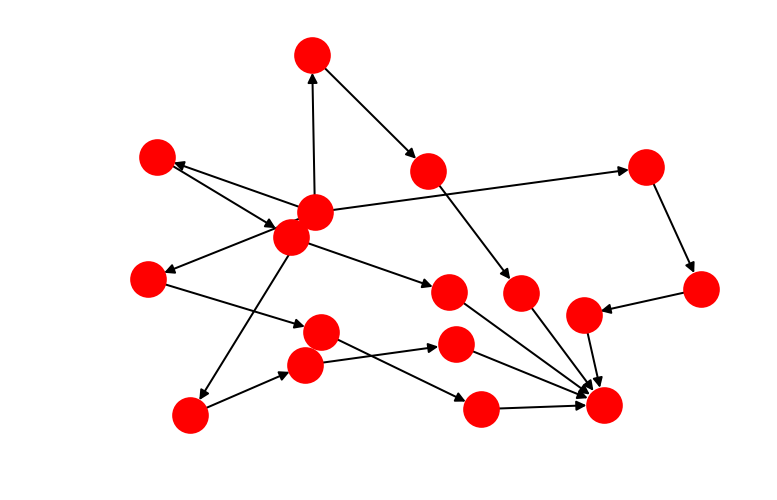

In [31]:
eleicao_da_ctrl.view()

da:  OrderedDict([('efetivo', 0.6)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


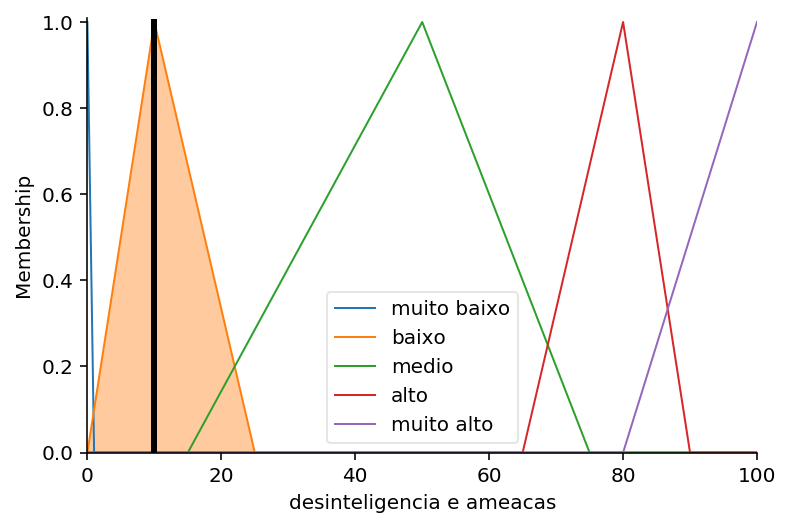

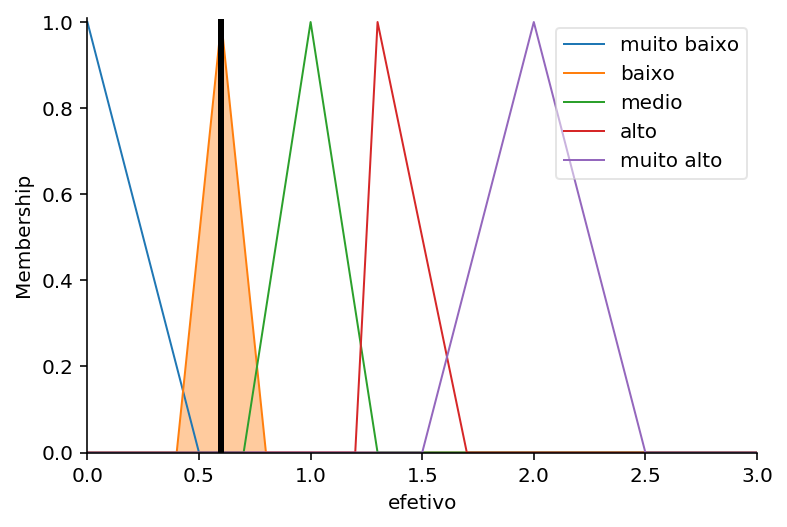

In [32]:
# Entrada
eleicao_da_sim.input['desinteligencia e ameacas'] = 10

# Calcula
eleicao_da_sim.compute()
n_ef_da = eleicao_da_sim.output
print('da: ', n_ef_da)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
da.view(sim=eleicao_da_sim)
ef_da.view(sim=eleicao_da_sim)

# Eleitores indígenas

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


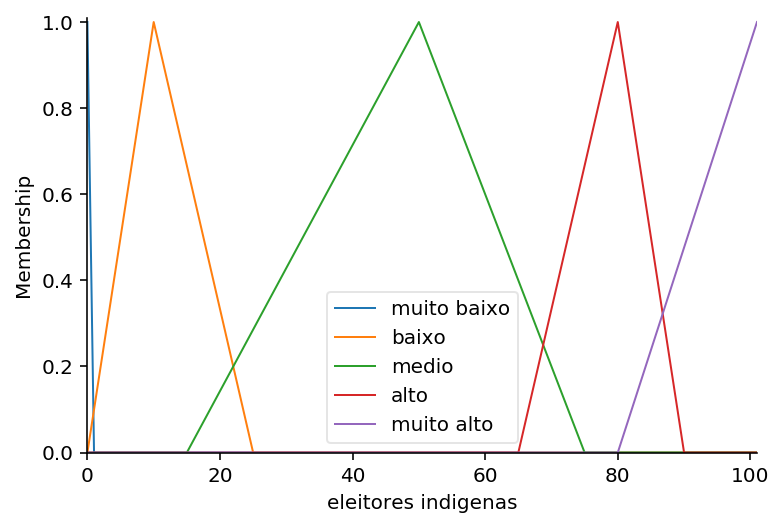

In [33]:
# Eleitores indígenas
ei= ctrl.Antecedent(np.arange(0, 102, 1), 'eleitores indigenas')

ei['muito baixo'] = fuzz.trimf(ei.universe, [0, 0, 1])
ei['baixo'] = fuzz.trimf(ei.universe, [0, 10, 25])
ei['medio'] = fuzz.trimf(ei.universe, [15, 50, 75])
ei['alto'] = fuzz.trimf(ei.universe, [65, 80, 90])
ei['muito alto'] = fuzz.trimf(ei.universe, [80, 101, 101])

ei.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


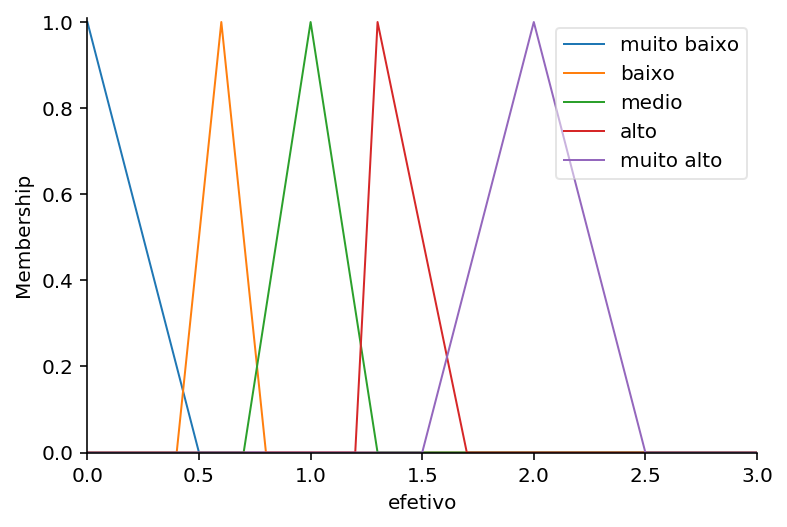

In [34]:
# Estimativa de efetivo (ei)
ef_ei = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef_ei['muito baixo'] = fuzz.trimf(ef_ei.universe, [0, 0, 0.5])
ef_ei['baixo'] = fuzz.trimf(ef_ei.universe, [0.4, 0.6, 0.8])
ef_ei['medio'] = fuzz.trimf(ef_ei.universe, [0.7, 1.0, 1.3])
ef_ei['alto'] = fuzz.trimf(ef_ei.universe, [1.2, 1.3, 1.7])
ef_ei['muito alto'] = fuzz.trimf(ef_ei.universe, [1.5, 2.0, 2.5])

ef_ei.view()

In [35]:
# Eleitores indígenas (ei)
regra_ei_ma_1 = ctrl.Rule(ei['muito alto'], ef_ei['muito alto'])
regra_ei_a_1 = ctrl.Rule(ei['alto'], ef_ei['alto'])
regra_ei_m_1 = ctrl.Rule(ei['medio'], ef_ei['medio'])
regra_ei_b_1 = ctrl.Rule(ei['baixo'], ef_ei['baixo'])
regra_ei_mb_1 = ctrl.Rule(ei['muito baixo'], ef_ei['muito baixo'])

In [36]:
# Cria um sistema de controle e uma simulação para eleitores indígenas
eleicao_ei_ctrl = ctrl.ControlSystem([regra_ei_ma_1, regra_ei_a_1, regra_ei_m_1, regra_ei_b_1, regra_ei_mb_1])
eleicao_ei_sim = ctrl.ControlSystemSimulation(eleicao_ei_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


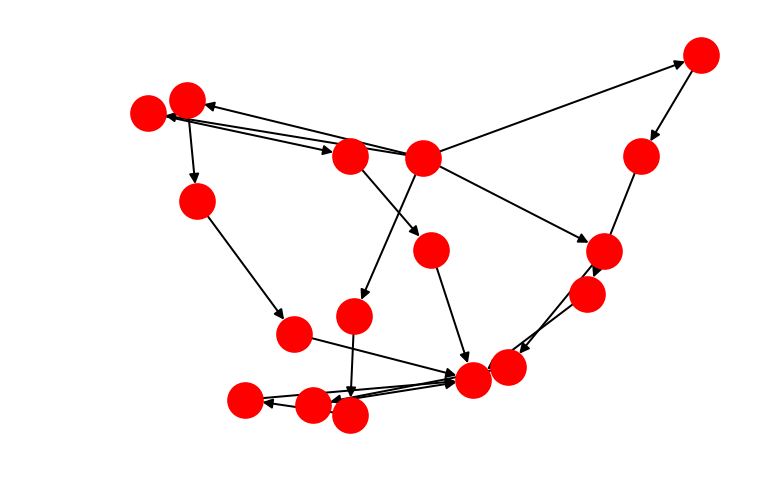

In [37]:
eleicao_ei_ctrl.view()

OrderedDict([('efetivo', 1.0)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


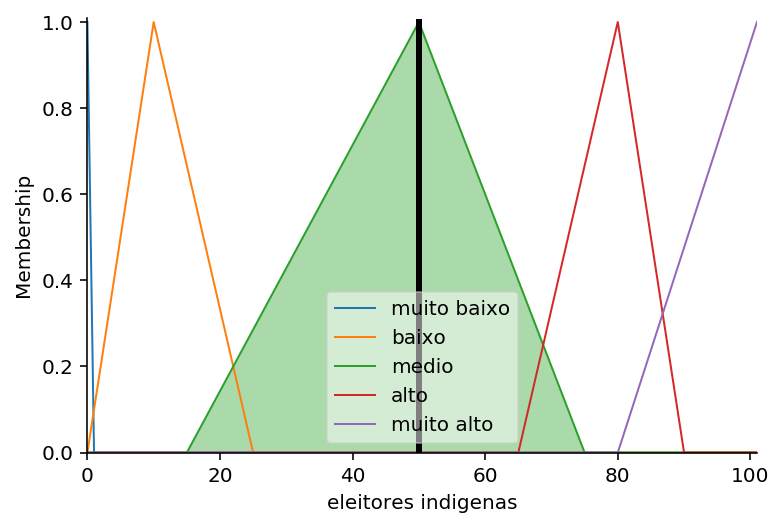

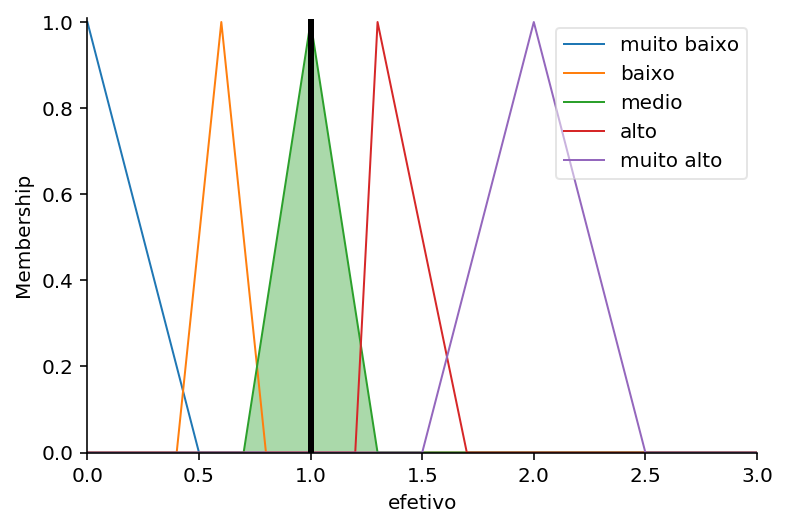

In [38]:
# Entrada
eleicao_ei_sim.input['eleitores indigenas'] = 50

# Calcula
eleicao_ei_sim.compute()
n_ef_ei = eleicao_ei_sim.output
print(n_ef_ei)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ei.view(sim=eleicao_ei_sim)
ef_ei.view(sim=eleicao_ei_sim)

# Modelo final

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


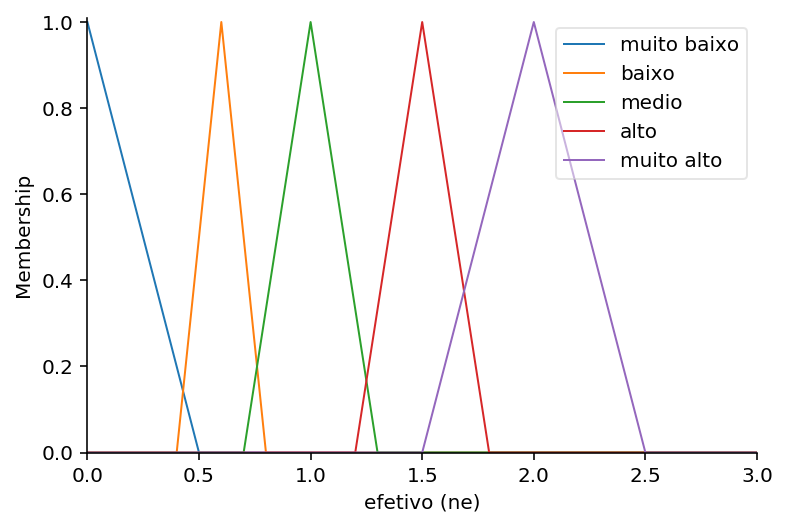

In [39]:
# Estimativa de efetivo (ne) antecedente
ef_ne_a = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'efetivo (ne)')

ef_ne_a['muito baixo'] = fuzz.trimf(ef_ne_a.universe, [0, 0, 0.5])
ef_ne_a['baixo'] = fuzz.trimf(ef_ne_a.universe, [0.4, 0.6, 0.8])
ef_ne_a['medio'] = fuzz.trimf(ef_ne_a.universe, [0.7, 1.0, 1.3])
ef_ne_a['alto'] = fuzz.trimf(ef_ne_a.universe, [1.2, 1.5, 1.8])
ef_ne_a['muito alto'] = fuzz.trimf(ef_ne_a.universe, [1.5, 2.0, 2.5])

ef_ne_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


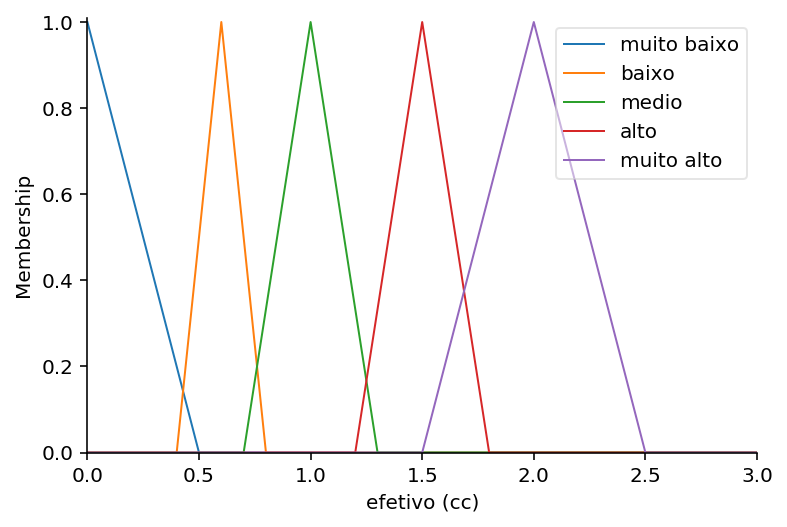

In [40]:
# Estimativa de efetivo (cc) antecedente
ef_cc_a = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'efetivo (cc)')

ef_cc_a['muito baixo'] = fuzz.trimf(ef_cc_a.universe, [0, 0, 0.5])
ef_cc_a['baixo'] = fuzz.trimf(ef_cc_a.universe, [0.4, 0.6, 0.8])
ef_cc_a['medio'] = fuzz.trimf(ef_cc_a.universe, [0.7, 1.0, 1.3])
ef_cc_a['alto'] = fuzz.trimf(ef_cc_a.universe, [1.2, 1.5, 1.8])
ef_cc_a['muito alto'] = fuzz.trimf(ef_cc_a.universe, [1.5, 2.0, 2.5])

ef_cc_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


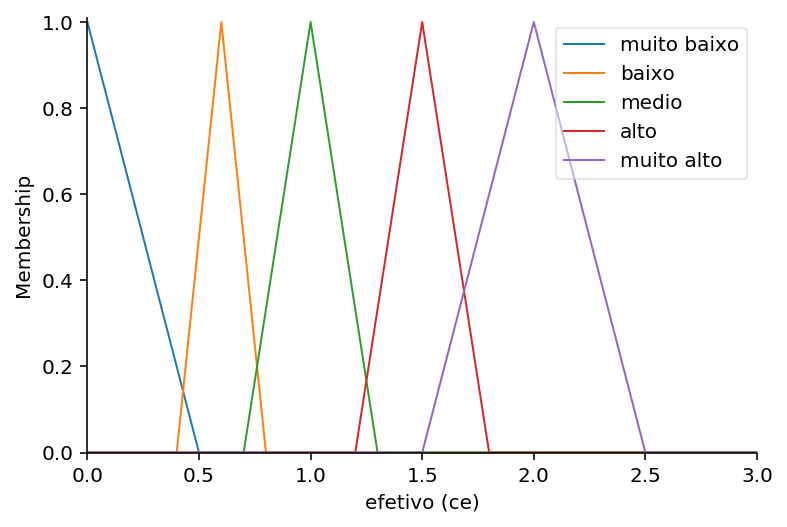

In [41]:
# Estimativa de efetivo (ce) antecedente
ef_ce_a = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'efetivo (ce)')

ef_ce_a['muito baixo'] = fuzz.trimf(ef_ce_a.universe, [0, 0, 0.5])
ef_ce_a['baixo'] = fuzz.trimf(ef_ce_a.universe, [0.4, 0.6, 0.8])
ef_ce_a['medio'] = fuzz.trimf(ef_ce_a.universe, [0.7, 1.0, 1.3])
ef_ce_a['alto'] = fuzz.trimf(ef_ce_a.universe, [1.2, 1.5, 1.8])
ef_ce_a['muito alto'] = fuzz.trimf(ef_ce_a.universe, [1.5, 2.0, 2.5])

ef_ce_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


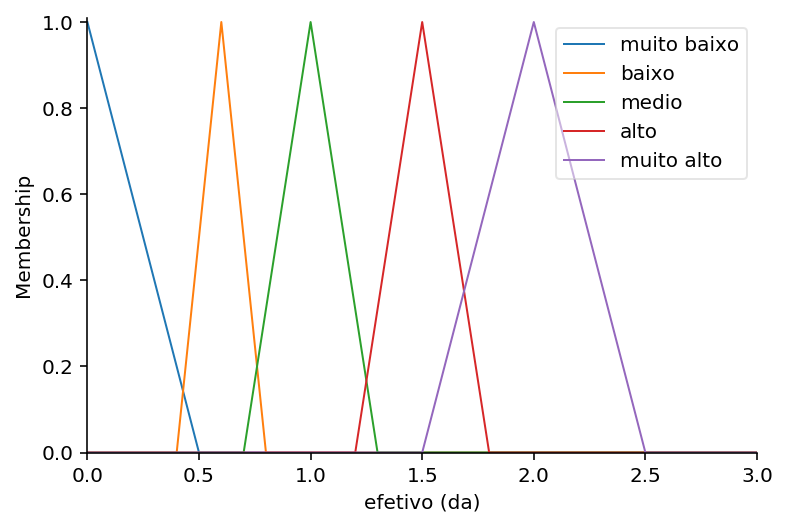

In [42]:
# Estimativa de efetivo (da) antecedente
ef_da_a = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'efetivo (da)')

ef_da_a['muito baixo'] = fuzz.trimf(ef_da_a.universe, [0, 0, 0.5])
ef_da_a['baixo'] = fuzz.trimf(ef_da_a.universe, [0.4, 0.6, 0.8])
ef_da_a['medio'] = fuzz.trimf(ef_da_a.universe, [0.7, 1.0, 1.3])
ef_da_a['alto'] = fuzz.trimf(ef_da_a.universe, [1.2, 1.5, 1.8])
ef_da_a['muito alto'] = fuzz.trimf(ef_da_a.universe, [1.5, 2.0, 2.5])

ef_da_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


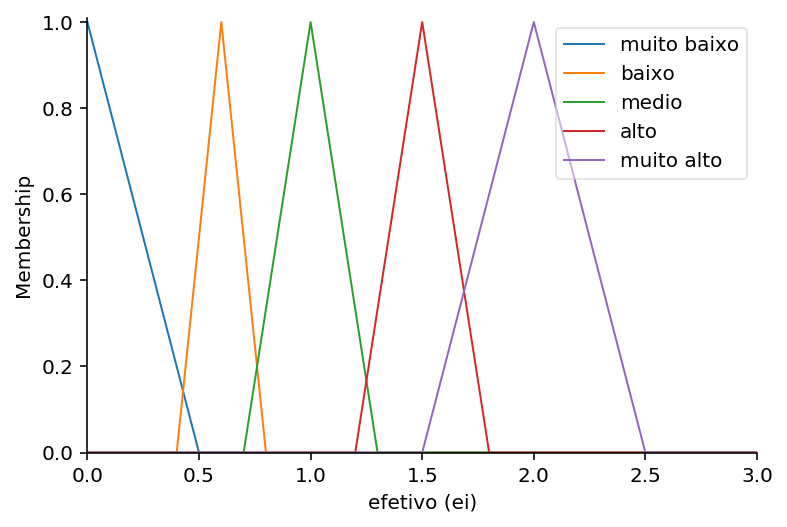

In [43]:
# Estimativa de efetivo (ei) antecedente
ef_ei_a = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'efetivo (ei)')

ef_ei_a['muito baixo'] = fuzz.trimf(ef_ei_a.universe, [0, 0, 0.5])
ef_ei_a['baixo'] = fuzz.trimf(ef_ei_a.universe, [0.4, 0.6, 0.8])
ef_ei_a['medio'] = fuzz.trimf(ef_ei_a.universe, [0.7, 1.0, 1.3])
ef_ei_a['alto'] = fuzz.trimf(ef_ei_a.universe, [1.2, 1.5, 1.8])
ef_ei_a['muito alto'] = fuzz.trimf(ef_ei_a.universe, [1.5, 2.0, 2.5])

ef_ei_a.view()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


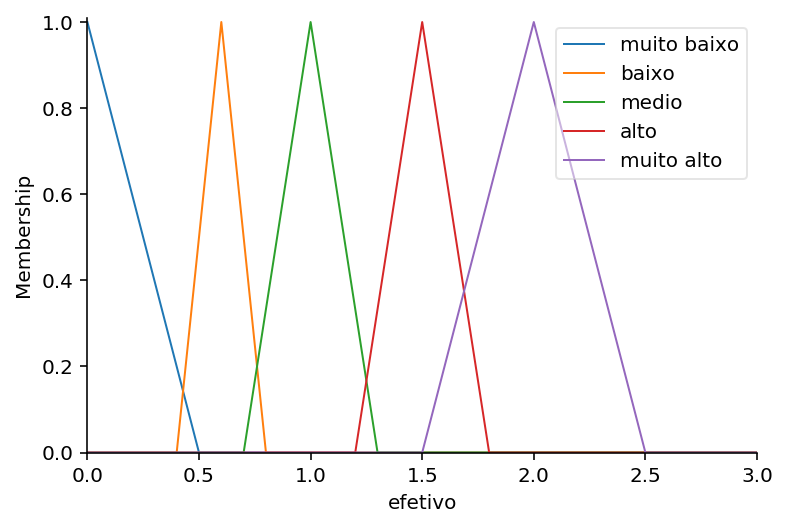

In [44]:
# Estimativa de efetivo (total)
ef = ctrl.Consequent(np.arange(0, 3.1, 0.1), 'efetivo')

ef['muito baixo'] = fuzz.trimf(ef.universe, [0, 0, 0.5])
ef['baixo'] = fuzz.trimf(ef.universe, [0.4, 0.6, 0.8])
ef['medio'] = fuzz.trimf(ef.universe, [0.7, 1.0, 1.3])
ef['alto'] = fuzz.trimf(ef.universe, [1.2, 1.5, 1.8])
ef['muito alto'] = fuzz.trimf(ef.universe, [1.5, 2.0, 2.5])

ef.view()

In [45]:
# Regras gerais
regra_ma_1 = ctrl.Rule(ef_ne_a['muito alto'] | ef_cc_a['muito alto'] | ef_ce_a['muito alto']  | ef_da_a['muito alto'] | ef_ei_a['muito alto'], ef['muito alto'])

regra_a_1 = ctrl.Rule(ef_ne_a['alto'] & ~ef_cc_a['muito alto'], ef['alto'])
regra_a_2 = ctrl.Rule(~ef_ne_a['muito alto'] & ef_cc_a['alto'], ef['alto'])
regra_a_3 = ctrl.Rule(ef_ce_a['alto'], ef['alto'])
regra_a_4 = ctrl.Rule(ef_da_a['alto'], ef['alto'])
regra_a_5 = ctrl.Rule(ef_ei_a['alto'], ef['alto'])

regra_m_1 = ctrl.Rule(ef_ne_a['medio'] & ef_cc_a['medio'], ef['medio'])
regra_m_2 = ctrl.Rule(ef_ne_a['medio'] & (ef_ce_a['baixo'] | ef_ce_a['muito baixo']), ef['medio'])
regra_m_3 = ctrl.Rule((ef_ne_a['baixo'] | ef_ne_a['muito baixo']) & ef_ce_a['medio'], ef['medio'])
regra_m_4 = ctrl.Rule(ef_ce_a['medio'], ef['medio'])
regra_m_5 = ctrl.Rule(ef_da_a['medio'], ef['medio'])
regra_m_6 = ctrl.Rule(ef_ei_a['medio'], ef['medio'])

regra_b_1 = ctrl.Rule(ef_ne_a['baixo'] & ef_cc_a['baixo'] & ef_ce_a['baixo'] & ef_da_a['baixo'] & ef_ei_a['baixo'], ef['baixo'])
regra_b_2 = ctrl.Rule(ef_ne_a['muito baixo'] & ef_cc_a['baixo'] & ef_ce_a['muito baixo'] & ef_da_a['muito baixo'] & ef_ei_a['muito baixo'], ef['baixo'])
regra_b_3 = ctrl.Rule(ef_ne_a['muito baixo'] & ef_cc_a['muito baixo'] & ef_ce_a['baixo'] & ef_da_a['muito baixo'] & ef_ei_a['muito baixo'], ef['baixo'])
regra_b_4 = ctrl.Rule(ef_ne_a['muito baixo'] & ef_cc_a['muito baixo'] & ef_ce_a['muito baixo'] & ef_da_a['baixo'] & ef_ei_a['muito baixo'], ef['baixo'])
regra_b_5 = ctrl.Rule(ef_ne_a['muito baixo'] & ef_cc_a['muito baixo'] & ef_ce_a['muito baixo'] & ef_da_a['muito baixo'] & ef_ei_a['baixo'], ef['baixo'])

regra_mb_1 = ctrl.Rule(ef_ne_a['muito baixo'] & ef_cc_a['muito baixo'] & ef_ce_a['muito baixo'] & ef_da_a['muito baixo'] & ef_ei_a['muito baixo'], ef['muito baixo'])

In [46]:
# Cria um sistema de controle e uma simulação total
eleicao_ctrl = ctrl.ControlSystem([regra_ma_1,
                                   regra_a_1, regra_a_2, regra_a_3, regra_a_4, regra_a_5,
                                   regra_m_1, regra_m_2, regra_m_3, regra_m_4, regra_m_5, regra_m_6,
                                   regra_b_1, regra_b_2, regra_b_3, regra_b_4, regra_b_5,
                                   regra_mb_1])
eleicao_sim = ctrl.ControlSystemSimulation(eleicao_ctrl)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


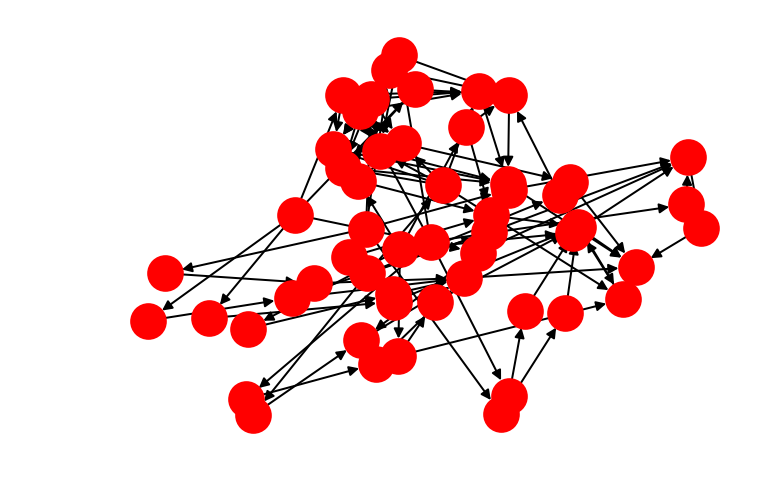

In [47]:
eleicao_ctrl.view()

OrderedDict([('efetivo', 1.0)])


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


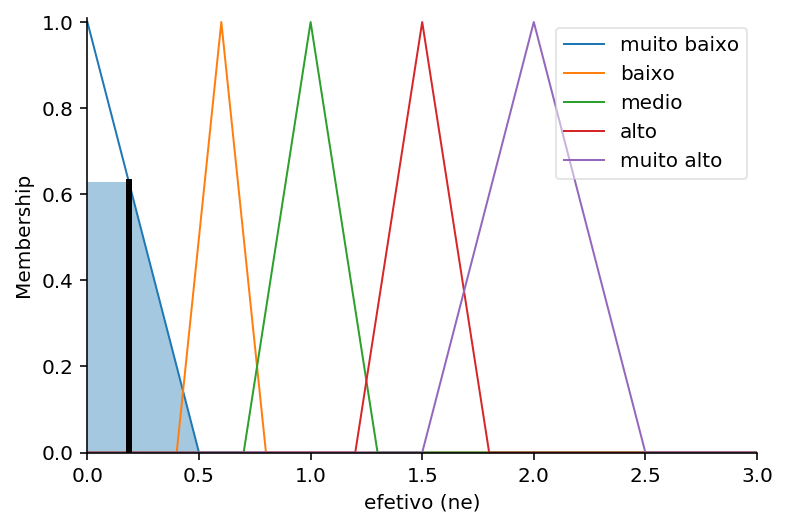

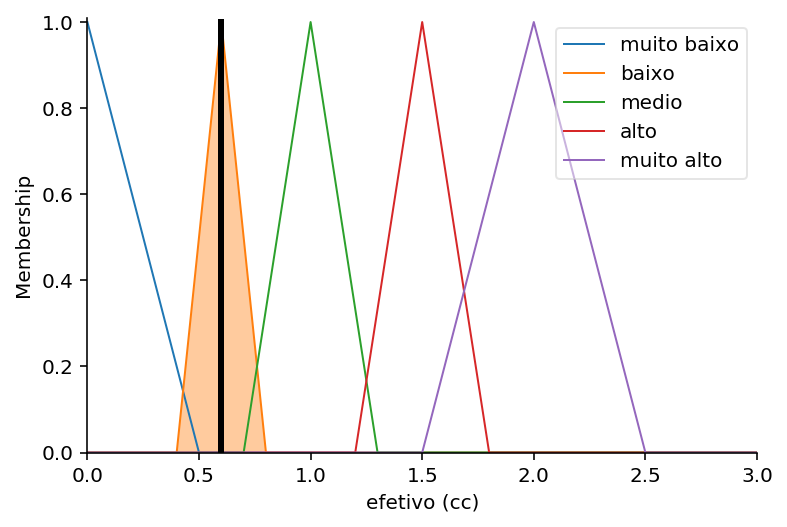

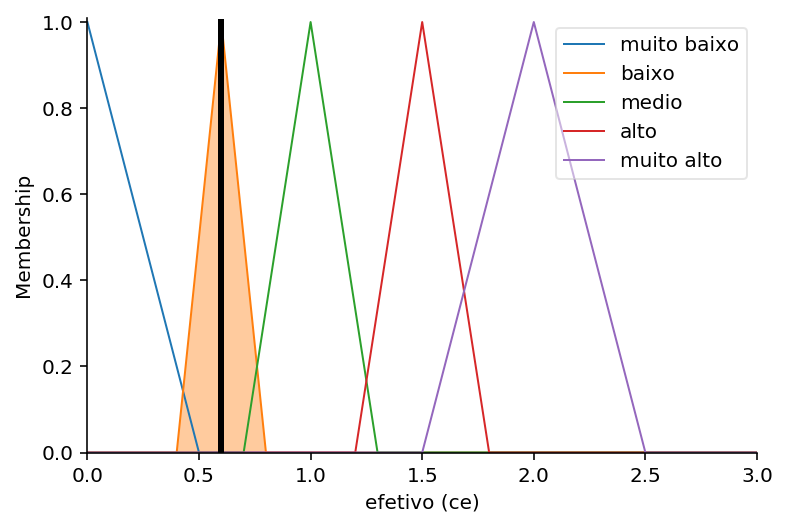

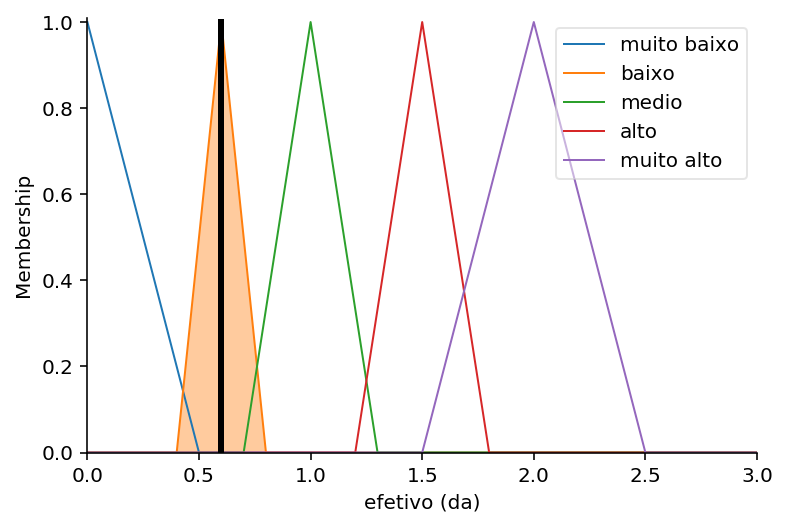

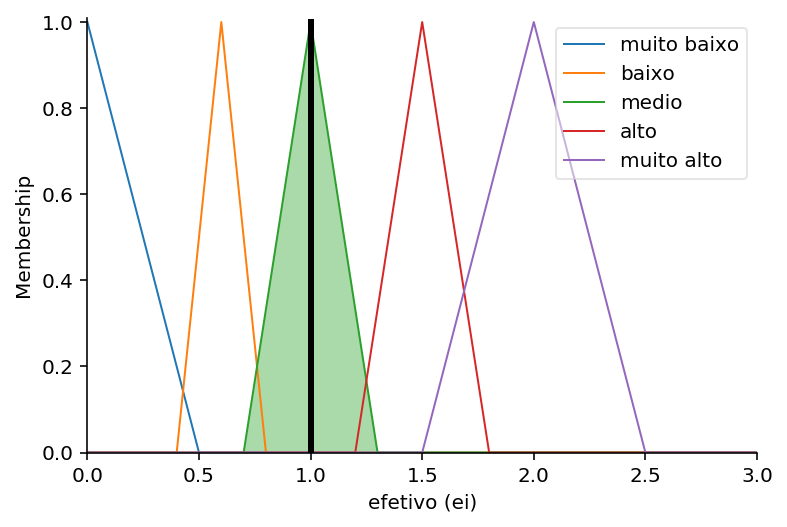

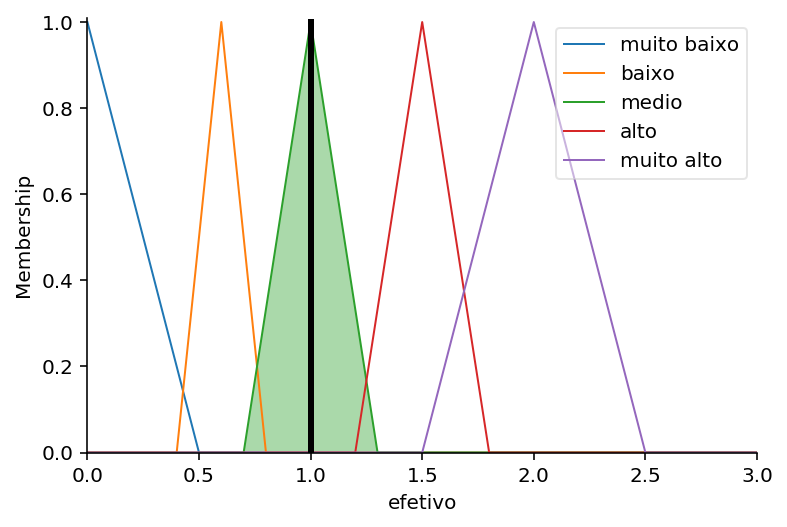

In [48]:
# Entrada
eleicao_sim.input['efetivo (ne)'] = n_ef_ne['efetivo']
eleicao_sim.input['efetivo (cc)'] = n_ef_cc['efetivo']
eleicao_sim.input['efetivo (ce)'] = n_ef_ce['efetivo']
eleicao_sim.input['efetivo (da)'] = n_ef_da['efetivo']
eleicao_sim.input['efetivo (ei)'] = n_ef_ei['efetivo']

# Calcula
eleicao_sim.compute()
n_ef = eleicao_sim.output
print(n_ef)

# Gráfico dos antecedentes e consequentes a partir dos cálculos
ef_ne_a.view(sim=eleicao_sim)
ef_cc_a.view(sim=eleicao_sim)
ef_ce_a.view(sim=eleicao_sim)
ef_da_a.view(sim=eleicao_sim)
ef_ei_a.view(sim=eleicao_sim)
ef.view(sim=eleicao_sim)

# Função para entrada e processamento dos dados

In [49]:
def est_ef(cas):
    ## Entrada
    print(cas)
    # ne
    eleicao_ne_sim.input['numero de eleitores'] = cas[1]
    eleicao_ne_sim.compute()
    n_ef_ne = eleicao_ne_sim.output
    print('ne: ', n_ef_ne)

    # cc
    eleicao_cc_sim.input['roubos'] = cas[2]
    eleicao_cc_sim.input['desordens'] = cas[3]
    eleicao_cc_sim.input['acao de faccao criminosa'] = cas[4]  
    eleicao_cc_sim.compute()
    n_ef_cc = eleicao_cc_sim.output
    print('cc: ', n_ef_cc)

    # ce
    eleicao_ce_sim.input['compra de sufragio'] = cas[5]
    eleicao_ce_sim.input['transporte irregular'] = cas[6]
    eleicao_ce_sim.input['fornecimento gratuito de alimento'] = cas[7]
    eleicao_ce_sim.input['boca de urna'] = cas[8]
    eleicao_ce_sim.input['crimes de concentracao de eleitores'] = cas[9]
    eleicao_ce_sim.compute()
    n_ef_ce = eleicao_cc_sim.output
    print('ce: ', n_ef_ce)

    # da
    eleicao_da_sim.input['desinteligencia e ameacas'] = cas[10]
    eleicao_da_sim.compute()
    n_ef_da = eleicao_da_sim.output
    print('da: ', n_ef_da)

    # ei
    eleicao_ei_sim.input['eleitores indigenas'] = cas[11]
    eleicao_ei_sim.compute()
    n_ef_ei = eleicao_ei_sim.output
    print('ei: ', n_ef_ei)

    ## ef
    eleicao_sim.input['efetivo (ne)'] = n_ef_ne['efetivo']
    eleicao_sim.input['efetivo (cc)'] = n_ef_cc['efetivo']
    eleicao_sim.input['efetivo (ce)'] = n_ef_ce['efetivo']
    eleicao_sim.input['efetivo (da)'] = n_ef_da['efetivo']
    eleicao_sim.input['efetivo (ei)'] = n_ef_ei['efetivo']
    eleicao_sim.compute()

    # print('-> ', eleicao_sim.output['efetivo'])
    return(eleicao_sim.output['efetivo'])

In [50]:
#      id     e  r  d afc cs ti fga bu cce  da ei
est_ef([1, 1074, 2, 3, 28, 0, 2,  1, 2,  1, 81, 14])

[1, 1074, 2, 3, 28, 0, 2, 1, 2, 1, 81, 14]
ne:  OrderedDict([('efetivo', 1.0)])
cc:  OrderedDict([('efetivo', 1.0000000000000002)])
ce:  OrderedDict([('efetivo', 1.0000000000000002)])
da:  OrderedDict([('efetivo', 1.4974838012958962)])
ei:  OrderedDict([('efetivo', 0.6)])


1.2499912062796947

# Cálculo da planilha

In [51]:
import pandas as pd

In [52]:
df = pd.read_excel('dados.xlsx', sheet_name='valores')
#df.set_index(['anp', 'mes'])

In [53]:
df[:5]

,id,numero de eleitores,roubos,desordens,acao de faccao criminosa,compra de sufragio,transporte irregular,fornecimento gratuito de alimento,boca de urna,crimes de concentracao de eleitores,desinteligencia e ameacas,eleitores indigenas
0,1,2252,2,1,84,0,1,0,3,2,59,39
1,2,2658,1,1,39,2,2,3,1,2,4,20
2,3,1663,3,3,62,3,1,1,3,0,76,43
3,4,2161,3,2,88,1,3,1,2,1,80,46
4,5,2331,1,0,90,0,1,1,0,1,90,24


In [54]:
df[:5]

,id,numero de eleitores,roubos,desordens,acao de faccao criminosa,compra de sufragio,transporte irregular,fornecimento gratuito de alimento,boca de urna,crimes de concentracao de eleitores,desinteligencia e ameacas,eleitores indigenas
0,1,2252,2,1,84,0,1,0,3,2,59,39
1,2,2658,1,1,39,2,2,3,1,2,4,20
2,3,1663,3,3,62,3,1,1,3,0,76,43
3,4,2161,3,2,88,1,3,1,2,1,80,46
4,5,2331,1,0,90,0,1,1,0,1,90,24


In [55]:
writer = pd.ExcelWriter('resultado.xlsx')
df.to_excel(writer,'saida1',index=False)
writer.save()